## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a, b = -1, 2
x_input = np.linspace(0,20)
y_output = a*x_input + b 

In [3]:
x_input

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
y_output

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

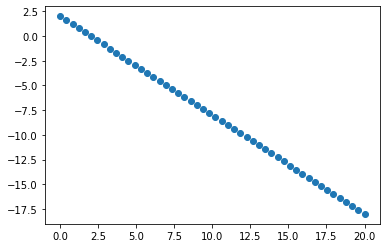

In [5]:
plt.scatter(x_input, y_output)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

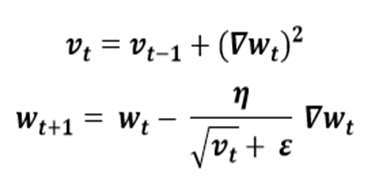

In [6]:
def adagrad_GD(x_input_fun, y_output_fun, learing_rate, epsilon, max_iter):
    m = len(x_input_fun)
    theta_0, theta_1, cost = 0, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs, hypothesis_vector = [], [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        hypothesis_vector.append(hypothesis)
        
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        
        if ((abs(gradients[0]) < 0.01) and (abs(gradients[1]) < 0.01)): 
            break 
            
        #Adagrad update
        v_new_0 = v_old_0 + (gradients[0] ** 2)
        v_new_1 = v_old_1 + (gradients[1] ** 2)
        theta_0 = theta_0 - (learing_rate/(math.sqrt(v_new_0) + epsilon))*gradients[0]
        theta_1 = theta_1 - (learing_rate/(math.sqrt(v_new_1) + epsilon))*gradients[1]
        v_old_0 = v_new_1
        v_old_1 = v_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)
        
    hypothesis_vector.append(all_theta_0[-1] + all_theta_1[-1] * x_input_fun)
    
    return all_theta_0, all_theta_1, costs, hypothesis_vector, all_theta_0[-1], all_theta_1[-1], i+1

In [7]:
#First trial

In [8]:
Epsilon = 1e-8
iteration = 1000
alpha = 0.01
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = adagrad_GD(x_input, y_output, alpha, Epsilon, iteration)

In [9]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([ -0.04482337,  -0.25694057,  -0.46905777,  -0.68117497,
        -0.89329218,  -1.10540938,  -1.31752658,  -1.52964378,
        -1.74176098,  -1.95387818,  -2.16599539,  -2.37811259,
        -2.59022979,  -2.80234699,  -3.01446419,  -3.22658139,
        -3.43869859,  -3.6508158 ,  -3.862933  ,  -4.0750502 ,
        -4.2871674 ,  -4.4992846 ,  -4.7114018 ,  -4.923519  ,
        -5.13563621,  -5.34775341,  -5.55987061,  -5.77198781,
        -5.98410501,  -6.19622221,  -6.40833941,  -6.62045662,
        -6.83257382,  -7.04469102,  -7.25680822,  -7.46892542,
        -7.68104262,  -7.89315983,  -8.10527703,  -8.31739423,
        -8.52951143,  -8.74162863,  -8.95374583,  -9.16586303,
        -9.37798024,  -9.59009744,  -9.80221464, -10.01433184,
       -10.22644904, -10.43856624])

In [10]:
r2_score(y_output, y_predicated)

0.5500030132567462

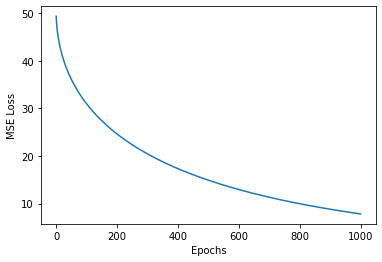

In [11]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

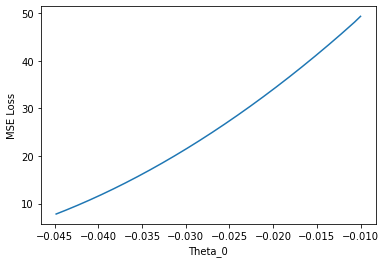

In [12]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

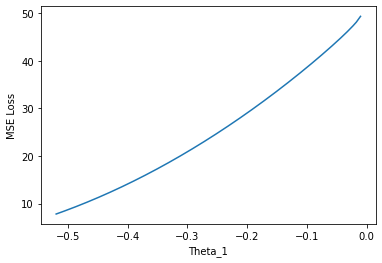

In [13]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

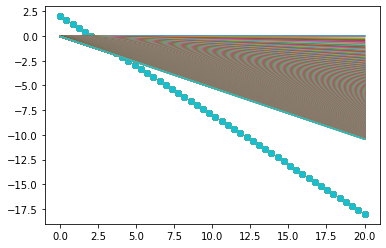

In [14]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

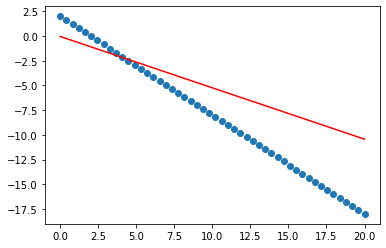

In [15]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

In [16]:
#Second trial

In [17]:
Epsilon = 1e-8
iteration = 1000
alpha = 0.1
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = adagrad_GD(x_input, y_output, alpha, Epsilon, iteration)

In [18]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([ 1.11440603e-02, -3.36636006e-01, -6.84416073e-01, -1.03219614e+00,
       -1.37997621e+00, -1.72775627e+00, -2.07553634e+00, -2.42331641e+00,
       -2.77109647e+00, -3.11887654e+00, -3.46665661e+00, -3.81443667e+00,
       -4.16221674e+00, -4.50999681e+00, -4.85777687e+00, -5.20555694e+00,
       -5.55333701e+00, -5.90111707e+00, -6.24889714e+00, -6.59667721e+00,
       -6.94445727e+00, -7.29223734e+00, -7.64001741e+00, -7.98779747e+00,
       -8.33557754e+00, -8.68335761e+00, -9.03113767e+00, -9.37891774e+00,
       -9.72669781e+00, -1.00744779e+01, -1.04222579e+01, -1.07700380e+01,
       -1.11178181e+01, -1.14655981e+01, -1.18133782e+01, -1.21611583e+01,
       -1.25089383e+01, -1.28567184e+01, -1.32044985e+01, -1.35522785e+01,
       -1.39000586e+01, -1.42478387e+01, -1.45956187e+01, -1.49433988e+01,
       -1.52911789e+01, -1.56389589e+01, -1.59867390e+01, -1.63345191e+01,
       -1.66822991e+01, -1.70300792e+01])

In [19]:
r2_score(y_output, y_predicated)

0.9706327457883293

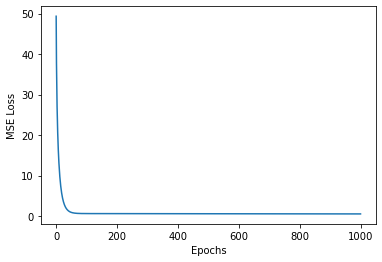

In [20]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

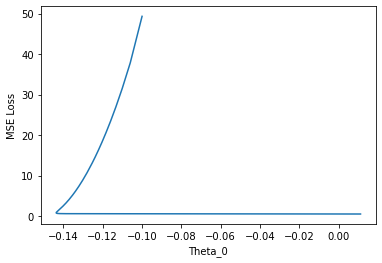

In [21]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

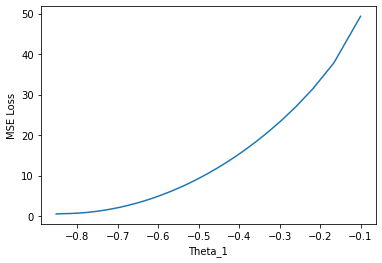

In [22]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

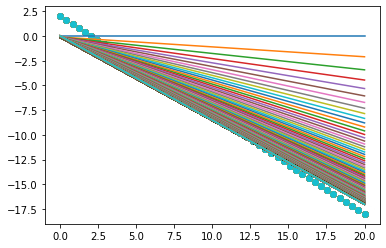

In [23]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

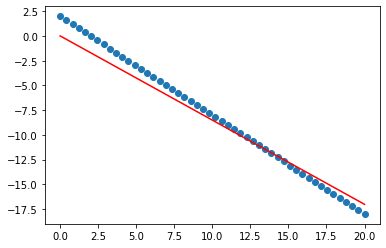

In [24]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

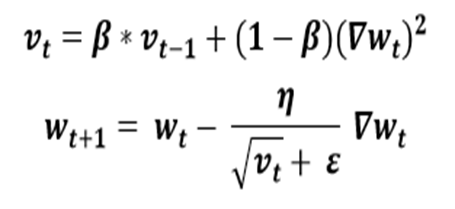

In [25]:
def RMSprop_GD(x_input_fun, y_output_fun, learing_rate, beta_f, epsilon, max_iter):
    m = len(x_input_fun)
    theta_0, theta_1, cost = 0, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs, hypothesis_vector = [], [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        hypothesis_vector.append(hypothesis)
        
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        
        if ((abs(gradients[0]) < 0.01) and (abs(gradients[1]) < 0.01)): 
            break  
                
        #RMSprop update
        v_new_0 = beta_f*v_old_0 + (1-beta_f)*(gradients[0] ** 2)
        v_new_1 = beta_f*v_old_1 + (1-beta_f)*(gradients[1] ** 2)
        theta_0 = theta_0 - (learing_rate/(math.sqrt(v_new_0) + epsilon))*gradients[0]
        theta_1 = theta_1 - (learing_rate/(math.sqrt(v_new_1) + epsilon))*gradients[1]
        v_old_0 = v_new_1
        v_old_1 = v_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    hypothesis_vector.append(all_theta_0[-1] + all_theta_1[-1] * x_input_fun)
    
    return all_theta_0, all_theta_1, costs, hypothesis_vector, all_theta_0[-1], all_theta_1[-1], i+1

In [26]:
#First Trial

In [27]:
iteration = 1000
alpha = 0.5
beta = 0.5
Epsilon = 1e-8
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = RMSprop_GD(x_input, y_output, alpha, beta, Epsilon, iteration)

In [28]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([  1.95909073,   1.44933274,   0.93957475,   0.42981676,
        -0.07994123,  -0.58969922,  -1.09945721,  -1.60921519,
        -2.11897318,  -2.62873117,  -3.13848916,  -3.64824715,
        -4.15800514,  -4.66776312,  -5.17752111,  -5.6872791 ,
        -6.19703709,  -6.70679508,  -7.21655307,  -7.72631106,
        -8.23606904,  -8.74582703,  -9.25558502,  -9.76534301,
       -10.275101  , -10.78485899, -11.29461697, -11.80437496,
       -12.31413295, -12.82389094, -13.33364893, -13.84340692,
       -14.35316491, -14.86292289, -15.37268088, -15.88243887,
       -16.39219686, -16.90195485, -17.41171284, -17.92147082,
       -18.43122881, -18.9409868 , -19.45074479, -19.96050278,
       -20.47026077, -20.98001876, -21.48977674, -21.99953473,
       -22.50929272, -23.01905071])

In [29]:
r2_score(y_output, y_predicated)

0.753551658302301

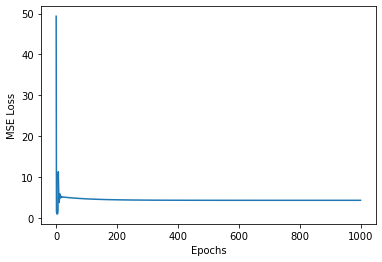

In [30]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

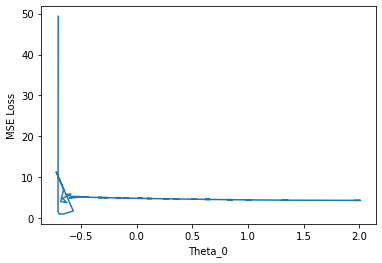

In [31]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

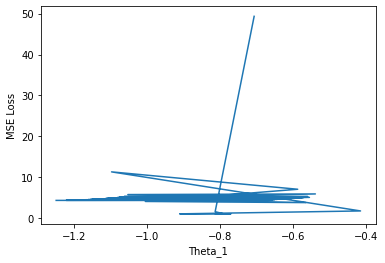

In [32]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

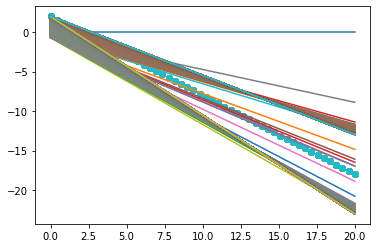

In [33]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

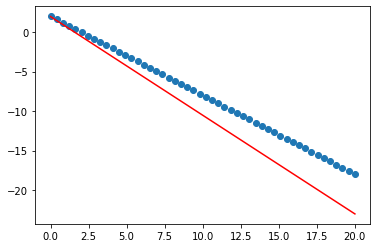

In [34]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

In [35]:
#Second trial

In [36]:
iteration = 1000
alpha = 0.01
beta = 0.9
Epsilon = 1e-8
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = RMSprop_GD(x_input, y_output, alpha, beta, Epsilon, iteration)

In [37]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([  1.94079046,   1.53647794,   1.13216541,   0.72785289,
         0.32354036,  -0.08077217,  -0.48508469,  -0.88939722,
        -1.29370974,  -1.69802227,  -2.1023348 ,  -2.50664732,
        -2.91095985,  -3.31527238,  -3.7195849 ,  -4.12389743,
        -4.52820995,  -4.93252248,  -5.33683501,  -5.74114753,
        -6.14546006,  -6.54977258,  -6.95408511,  -7.35839764,
        -7.76271016,  -8.16702269,  -8.57133521,  -8.97564774,
        -9.37996027,  -9.78427279, -10.18858532, -10.59289784,
       -10.99721037, -11.4015229 , -11.80583542, -12.21014795,
       -12.61446047, -13.018773  , -13.42308553, -13.82739805,
       -14.23171058, -14.6360231 , -15.04033563, -15.44464816,
       -15.84896068, -16.25327321, -16.65758573, -17.06189826,
       -17.46621079, -17.87052331])

In [38]:
r2_score(y_output, y_predicated)

0.9998754149250534

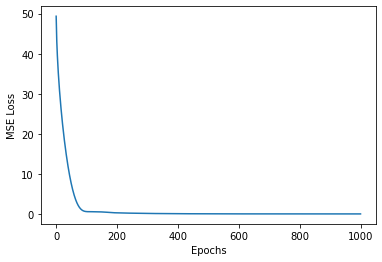

In [39]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

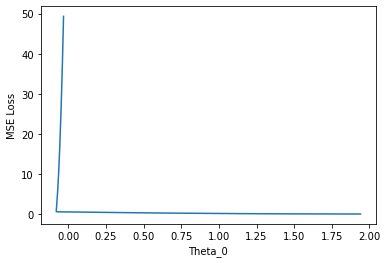

In [40]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

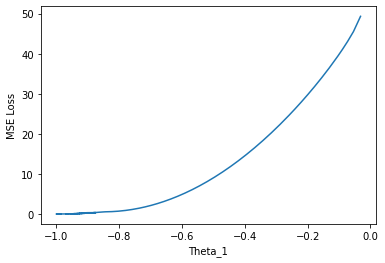

In [41]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

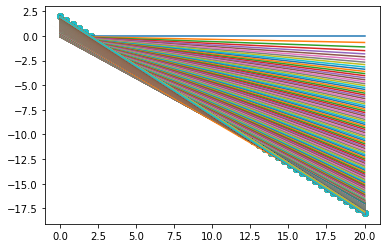

In [42]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

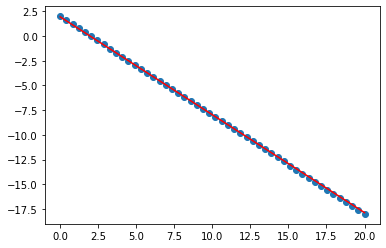

In [43]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

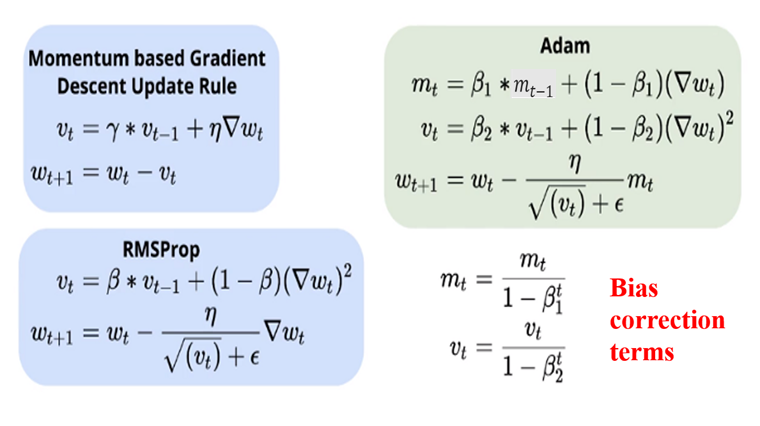

In [44]:
def adam_GD(x_input_fun, y_output_fun, learing_rate, beta_1_f, beta_2_f, epsilon, max_iter):
    m = len(x_input_fun)
    theta_0, theta_1, cost = 0, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    m_old_0, m_new_0, m_old_1, m_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs, hypothesis_vector = [], [], [], []
    
    for i in range(1, max_iter+1):
        hypothesis = theta_0 + theta_1 * x_input_fun
        hypothesis_vector.append(hypothesis)
            
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        
        if ((abs(gradients[0]) < 0.01) and (abs(gradients[1]) < 0.01)): 
            break 
        
        #Adam update
        m_new_0 = beta_1_f*m_old_0 + (1-beta_1_f)*gradients[0]
        m_new_1 = beta_1_f*m_old_1 + (1-beta_1_f)*gradients[1]
        
        v_new_0 = beta_2_f*v_old_0 + (1-beta_2_f)*(gradients[0] ** 2)
        v_new_1 = beta_2_f*v_old_1 + (1-beta_2_f)*(gradients[1] ** 2)   
        
        #bias correction 
        m_correction_0 = m_new_0/(1-(beta_1_f**i))
        m_correction_1 = m_new_1/(1-(beta_1_f**i))
        v_correction_0 = v_new_0/(1-(beta_2_f**i))
        v_correction_1 = v_new_1/(1-(beta_2_f**i))
        
        theta_0 = theta_0 - (learing_rate/(math.sqrt(v_correction_0) + epsilon))*m_correction_0
        theta_1 = theta_1 - (learing_rate/(math.sqrt(v_correction_1) + epsilon))*m_correction_1
        
        v_old_0 = v_new_1
        v_old_1 = v_new_1
        m_old_0 = m_new_1
        m_old_1 = m_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    hypothesis_vector.append(all_theta_0[-1] + all_theta_1[-1] * x_input_fun)
    
    return all_theta_0, all_theta_1, costs, hypothesis_vector, all_theta_0[-1], all_theta_1[-1], i

In [45]:
#First Trial

In [46]:
iteration = 1000
alpha = 0.01
beta_1 = 0.99
beta_2 = 0.99
Epsilon = 1e-8
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = adam_GD(x_input, y_output, alpha, beta_1, beta_2, Epsilon, iteration)

In [47]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([ -0.76897203,  -1.09147136,  -1.41397069,  -1.73647002,
        -2.05896935,  -2.38146868,  -2.70396801,  -3.02646734,
        -3.34896666,  -3.67146599,  -3.99396532,  -4.31646465,
        -4.63896398,  -4.96146331,  -5.28396264,  -5.60646196,
        -5.92896129,  -6.25146062,  -6.57395995,  -6.89645928,
        -7.21895861,  -7.54145794,  -7.86395726,  -8.18645659,
        -8.50895592,  -8.83145525,  -9.15395458,  -9.47645391,
        -9.79895324, -10.12145257, -10.44395189, -10.76645122,
       -11.08895055, -11.41144988, -11.73394921, -12.05644854,
       -12.37894787, -12.70144719, -13.02394652, -13.34644585,
       -13.66894518, -13.99144451, -14.31394384, -14.63644317,
       -14.95894249, -15.28144182, -15.60394115, -15.92644048,
       -16.24893981, -16.57143914])

In [48]:
r2_score(y_output, y_predicated)

0.9430049699080105

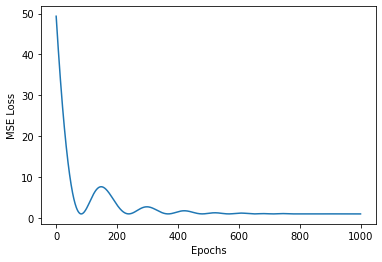

In [49]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

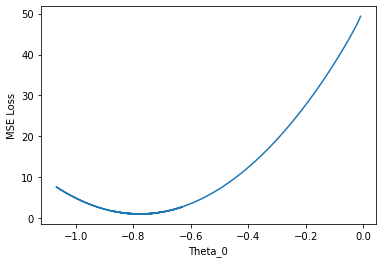

In [50]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

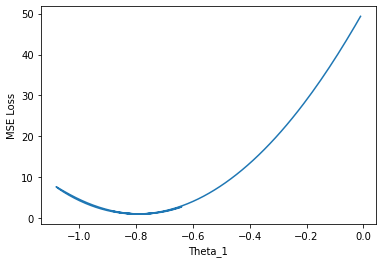

In [51]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

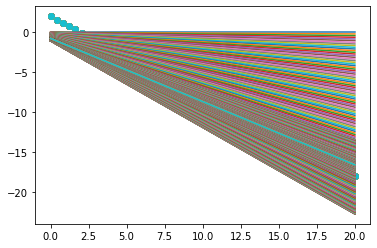

In [52]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

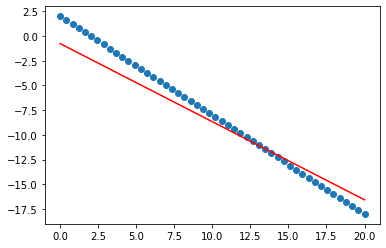

In [53]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

In [54]:
#Second Trial

In [55]:
iteration = 1000
alpha = 0.01
beta_1 = 0.09
beta_2 = 0.9
Epsilon = 1e-8
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = adam_GD(x_input, y_output, alpha, beta_1, beta_2, Epsilon, iteration)

In [56]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([  1.95310178,   1.54465979,   1.13621779,   0.7277758 ,
         0.3193338 ,  -0.08910819,  -0.49755019,  -0.90599218,
        -1.31443418,  -1.72287617,  -2.13131817,  -2.53976016,
        -2.94820216,  -3.35664416,  -3.76508615,  -4.17352815,
        -4.58197014,  -4.99041214,  -5.39885413,  -5.80729613,
        -6.21573812,  -6.62418012,  -7.03262211,  -7.44106411,
        -7.8495061 ,  -8.2579481 ,  -8.66639009,  -9.07483209,
        -9.48327409,  -9.89171608, -10.30015808, -10.70860007,
       -11.11704207, -11.52548406, -11.93392606, -12.34236805,
       -12.75081005, -13.15925204, -13.56769404, -13.97613603,
       -14.38457803, -14.79302002, -15.20146202, -15.60990402,
       -16.01834601, -16.42678801, -16.83523   , -17.243672  ,
       -17.65211399, -18.06055599])

In [57]:
r2_score(y_output, y_predicated)

0.9999163316206959

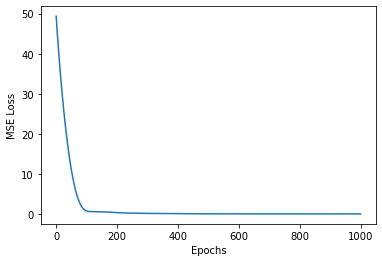

In [58]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

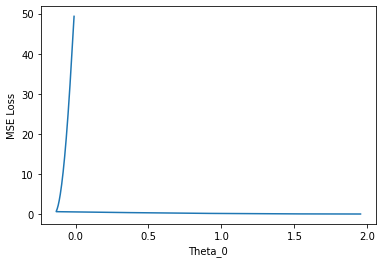

In [59]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

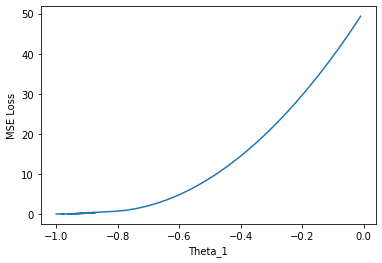

In [60]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

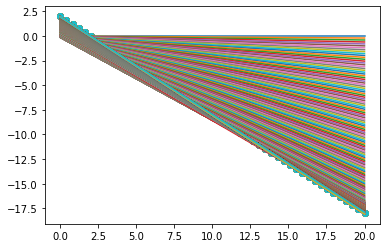

In [61]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

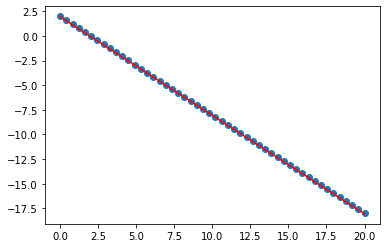

In [62]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

## Comparing between Adagrad, RMSprop and Adam  
## at alpha = 0.01, beta1 = 0.09 and beta2 = 0.9 

## Adagrad

In [63]:
Epsilon = 1e-8
iteration = 1000
alpha = 0.01
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = adagrad_GD(x_input, y_output, alpha, Epsilon, iteration)

In [64]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([ -0.04482337,  -0.25694057,  -0.46905777,  -0.68117497,
        -0.89329218,  -1.10540938,  -1.31752658,  -1.52964378,
        -1.74176098,  -1.95387818,  -2.16599539,  -2.37811259,
        -2.59022979,  -2.80234699,  -3.01446419,  -3.22658139,
        -3.43869859,  -3.6508158 ,  -3.862933  ,  -4.0750502 ,
        -4.2871674 ,  -4.4992846 ,  -4.7114018 ,  -4.923519  ,
        -5.13563621,  -5.34775341,  -5.55987061,  -5.77198781,
        -5.98410501,  -6.19622221,  -6.40833941,  -6.62045662,
        -6.83257382,  -7.04469102,  -7.25680822,  -7.46892542,
        -7.68104262,  -7.89315983,  -8.10527703,  -8.31739423,
        -8.52951143,  -8.74162863,  -8.95374583,  -9.16586303,
        -9.37798024,  -9.59009744,  -9.80221464, -10.01433184,
       -10.22644904, -10.43856624])

In [65]:
r2_score(y_output, y_predicated)

0.5500030132567462

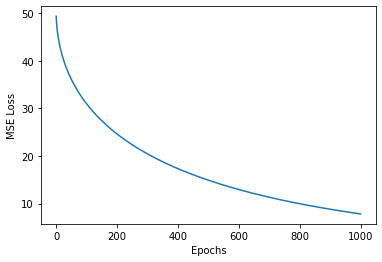

In [66]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

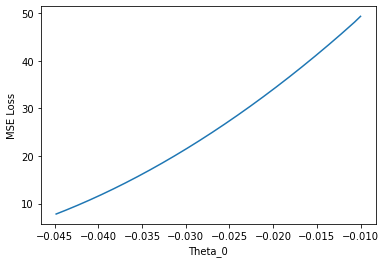

In [67]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

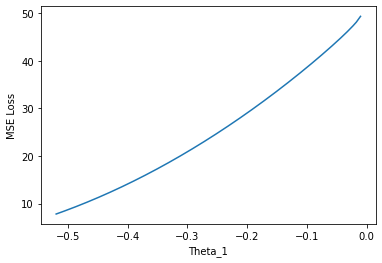

In [68]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

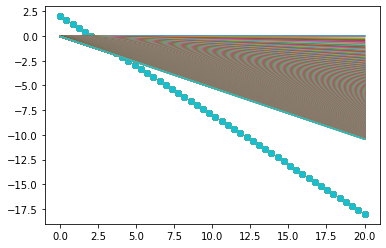

In [69]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

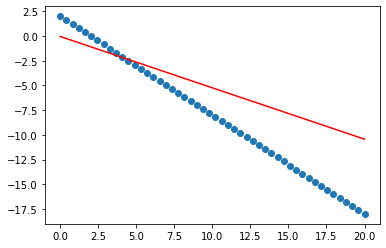

In [70]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

## RMSprop

In [71]:
iteration = 1000
alpha = 0.01
beta = 0.9
Epsilon = 1e-8
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = RMSprop_GD(x_input, y_output, alpha, beta, Epsilon, iteration)

In [72]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([  1.94079046,   1.53647794,   1.13216541,   0.72785289,
         0.32354036,  -0.08077217,  -0.48508469,  -0.88939722,
        -1.29370974,  -1.69802227,  -2.1023348 ,  -2.50664732,
        -2.91095985,  -3.31527238,  -3.7195849 ,  -4.12389743,
        -4.52820995,  -4.93252248,  -5.33683501,  -5.74114753,
        -6.14546006,  -6.54977258,  -6.95408511,  -7.35839764,
        -7.76271016,  -8.16702269,  -8.57133521,  -8.97564774,
        -9.37996027,  -9.78427279, -10.18858532, -10.59289784,
       -10.99721037, -11.4015229 , -11.80583542, -12.21014795,
       -12.61446047, -13.018773  , -13.42308553, -13.82739805,
       -14.23171058, -14.6360231 , -15.04033563, -15.44464816,
       -15.84896068, -16.25327321, -16.65758573, -17.06189826,
       -17.46621079, -17.87052331])

In [73]:
r2_score(y_output, y_predicated)

0.9998754149250534

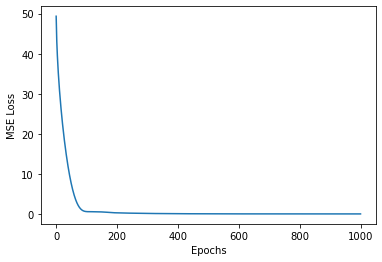

In [74]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

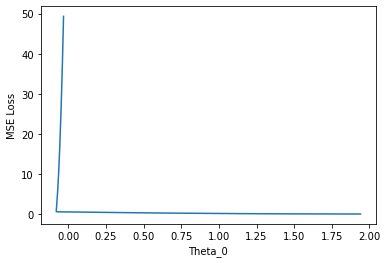

In [75]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

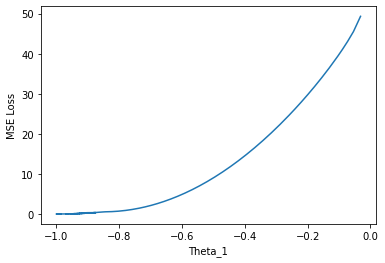

In [76]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

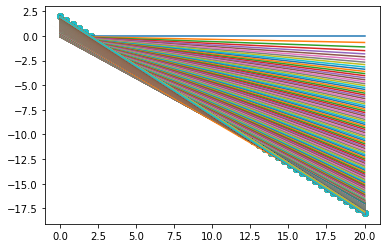

In [77]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

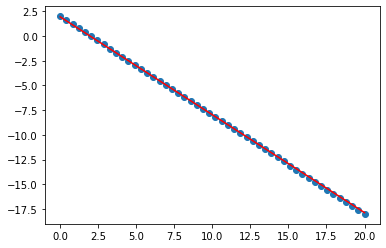

In [78]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

## Adam

In [79]:
iteration = 1000
alpha = 0.01
beta_1 = 0.09
beta_2 = 0.9
Epsilon = 1e-8
thetas_0, thetas_1, costs, hypothesis, theta_0_opt, theta_1_opt, actual_iter = adam_GD(x_input, y_output, alpha, beta_1, beta_2, Epsilon, iteration)

In [80]:
y_predicated = theta_0_opt + theta_1_opt * x_input
y_predicated

array([  1.95310178,   1.54465979,   1.13621779,   0.7277758 ,
         0.3193338 ,  -0.08910819,  -0.49755019,  -0.90599218,
        -1.31443418,  -1.72287617,  -2.13131817,  -2.53976016,
        -2.94820216,  -3.35664416,  -3.76508615,  -4.17352815,
        -4.58197014,  -4.99041214,  -5.39885413,  -5.80729613,
        -6.21573812,  -6.62418012,  -7.03262211,  -7.44106411,
        -7.8495061 ,  -8.2579481 ,  -8.66639009,  -9.07483209,
        -9.48327409,  -9.89171608, -10.30015808, -10.70860007,
       -11.11704207, -11.52548406, -11.93392606, -12.34236805,
       -12.75081005, -13.15925204, -13.56769404, -13.97613603,
       -14.38457803, -14.79302002, -15.20146202, -15.60990402,
       -16.01834601, -16.42678801, -16.83523   , -17.243672  ,
       -17.65211399, -18.06055599])

In [81]:
r2_score(y_output, y_predicated)

0.9999163316206959

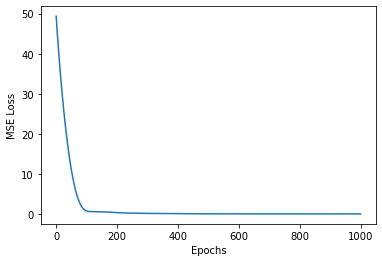

In [82]:
plt.plot(np.linspace(0,actual_iter,num=actual_iter),costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

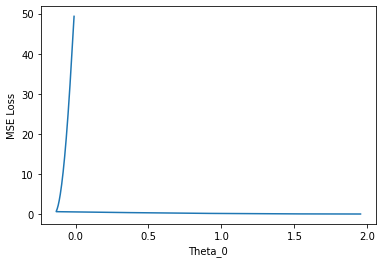

In [83]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

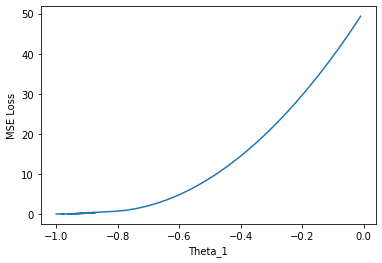

In [84]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

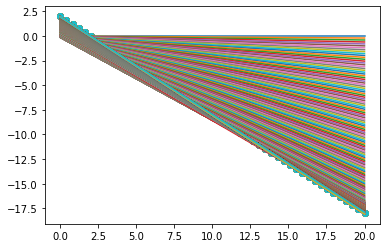

In [85]:
for i in range(actual_iter):
    plt.scatter(x_input, y_output)
    plt.plot(x_input, hypothesis[i])

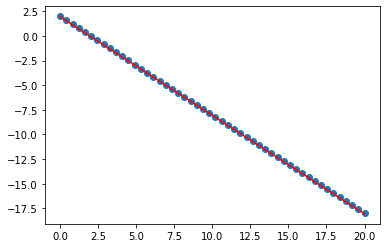

In [86]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated, 'r')

## Congratulations 
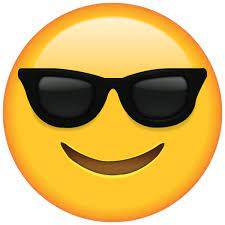